In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report 

In [ ]:
#Importing The Data-set
bank=pd.read_csv("bank-full.csv")
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
bank.isnull().sum() 

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
bank.describe() 

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<Axes: xlabel='y', ylabel='age'>

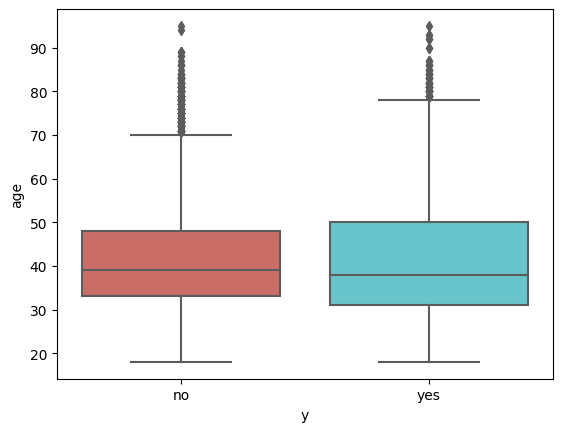

In [ ]:
sb.boxplot(x="y",y="age",data=bank,palette="hls")

In [ ]:
bank.drop(["job","marital","education","contact","month","duration","campaign","pdays","previous","poutcome"],inplace=True,axis = 1)

In [ ]:
bank

,age,default,balance,housing,loan,day,y
0,58,no,2143,yes,no,5,no
1,44,no,29,yes,no,5,no
2,33,no,2,yes,yes,5,no
3,47,no,1506,yes,no,5,no
4,33,no,1,no,no,5,no
...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,yes
45207,71,no,1729,no,no,17,yes
45208,72,no,5715,no,no,17,yes
45209,57,no,668,no,no,17,no


<Axes: xlabel='y', ylabel='count'>

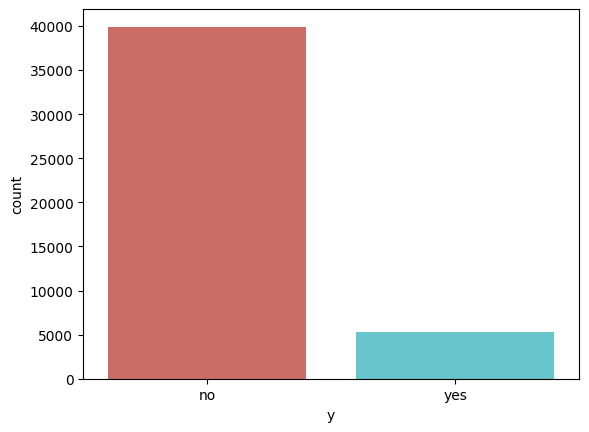

In [ ]:
sb.countplot(x="y",data=bank,palette="hls") 

In [ ]:
#One-Hot Encoding Of Categrical Variables
data1=pd.get_dummies(bank,columns=['default','housing','loan','y'],drop_first=True)
data1

,age,balance,day,default_yes,housing_yes,loan_yes,y_yes
0,58,2143,5,0,1,0,0
1,44,29,5,0,1,0,0
2,33,2,5,0,1,1,0
3,47,1506,5,0,1,0,0
4,33,1,5,0,0,0,0
...,...,...,...,...,...,...,...
45206,51,825,17,0,0,0,1
45207,71,1729,17,0,0,0,1
45208,72,5715,17,0,0,0,1
45209,57,668,17,0,0,0,0


In [ ]:
pd.crosstab(data1.y_yes,data1.housing_yes) 

housing_yes,0,1
y_yes,,
0,16727,23195
1,3354,1935


<Axes: xlabel='y_yes'>

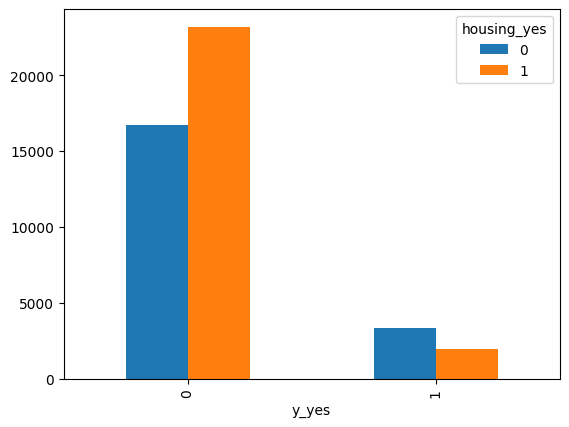

In [ ]:
pd.crosstab(data1.y_yes,data1.housing_yes).plot(kind = 'bar') 

<Axes: xlabel='default_yes', ylabel='count'>

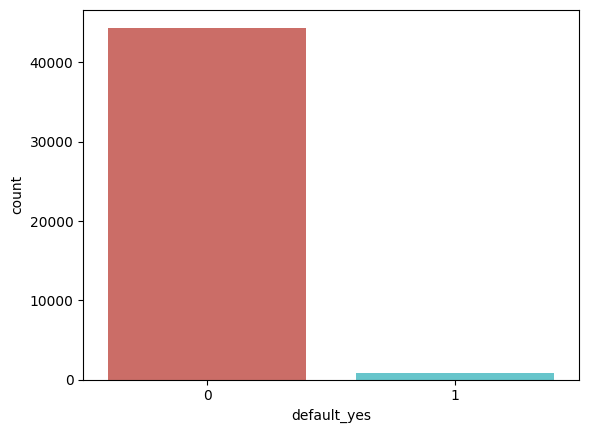

In [ ]:
sb.countplot(x="default_yes",data=data1,palette="hls")

<Axes: xlabel='loan_yes', ylabel='count'>

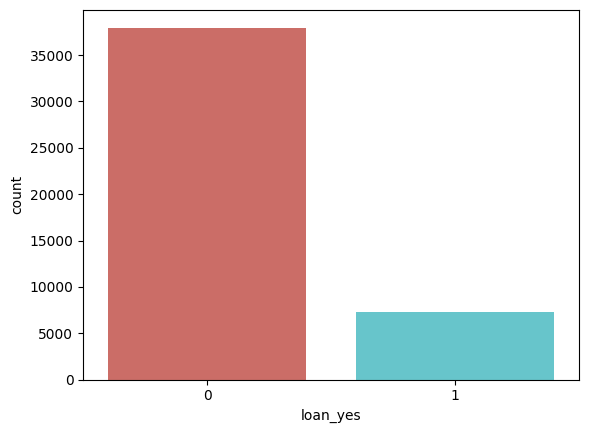

In [ ]:
sb.countplot(x="loan_yes",data=data1,palette="hls")

<Axes: xlabel='default_yes'>

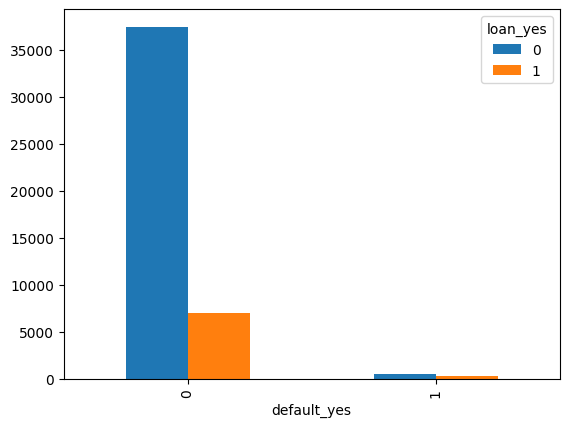

In [ ]:
pd.crosstab(data1.default_yes,data1.loan_yes).plot(kind = 'bar') 

In [ ]:
data1.isnull().sum()

age            0
balance        0
day            0
default_yes    0
housing_yes    0
loan_yes       0
y_yes          0
dtype: int64

In [ ]:
#Model building 
from sklearn.linear_model import LogisticRegression
data1.shape  

(45211, 7)

In [ ]:
X = data1.iloc[:,[0,1,2,3,4,5]]
Y = data1.iloc[:,6]
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [ ]:
classifier.coef_  # coefficients of features  

array([[-5.95932525e-03,  2.63806479e-05, -1.46673368e-02,
        -1.51342435e-01, -8.99571137e-01, -8.51018990e-01]])

In [ ]:
classifier.predict_proba(X) # Probability values  

array([[0.90989828, 0.09010172],
       [0.90760461, 0.09239539],
       [0.95567675, 0.04432325],
       ...,
       [0.82892524, 0.17107476],
       [0.83504082, 0.16495918],
       [0.80873965, 0.19126035]])

In [ ]:
y_pred = classifier.predict(X)
data1["y_yes"] = y_pred
data1   

,age,balance,day,default_yes,housing_yes,loan_yes,y_yes
0,58,2143,5,0,1,0,0
1,44,29,5,0,1,0,0
2,33,2,5,0,1,1,0
3,47,1506,5,0,1,0,0
4,33,1,5,0,0,0,0
...,...,...,...,...,...,...,...
45206,51,825,17,0,0,0,0
45207,71,1729,17,0,0,0,0
45208,72,5715,17,0,0,0,0
45209,57,668,17,0,0,0,0


In [ ]:
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
new_df = pd.concat([data1,y_prob],axis=1)
new_df 

,age,balance,day,default_yes,housing_yes,loan_yes,y_yes,0,1
0,58,2143,5,0,1,0,0,0.909898,0.090102
1,44,29,5,0,1,0,0,0.907605,0.092395
2,33,2,5,0,1,1,0,0.955677,0.044323
3,47,1506,5,0,1,0,0,0.905821,0.094179
4,33,1,5,0,0,0,0,0.789239,0.210761
...,...,...,...,...,...,...,...,...,...
45206,51,825,17,0,0,0,0,0.829471,0.170529
45207,71,1729,17,0,0,0,0,0.842536,0.157464
45208,72,5715,17,0,0,0,0,0.828925,0.171075
45209,57,668,17,0,0,0,0,0.835041,0.164959


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix) 

[[39914     8]
 [ 5287     2]]


In [ ]:
pd.crosstab(y_pred,Y)

y_yes,0,1
row_0,,
0,39914,5287
1,8,2


In [ ]:
#type(y_pred)
accuracy = sum(Y==y_pred)/data1.shape[0]
accuracy 

0.8828824843511535

In [ ]:
#type(y_pred)
accuracy = sum(Y==y_pred)/data1.shape[0]
accuracy 

0.8828824843511535

In [ ]:
from sklearn.metrics import classification_report 
print (classification_report (Y, y_pred)) 

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     39922
           1       0.20      0.00      0.00      5289

    accuracy                           0.88     45211
   macro avg       0.54      0.50      0.47     45211
weighted avg       0.80      0.88      0.83     45211



In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(Y,classifier.predict(X))
Logit_roc_score 

0.5000888762771655

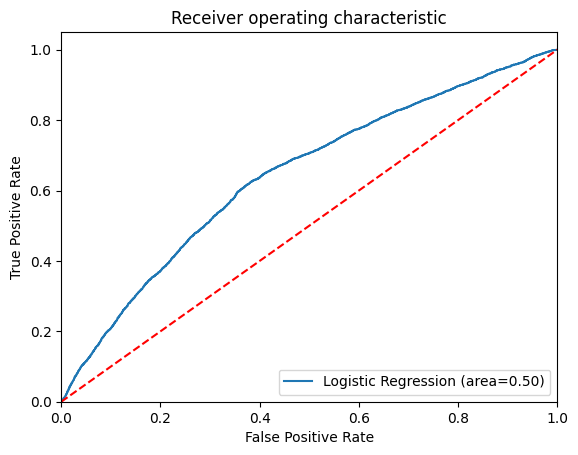

In [ ]:
fpr, tpr, thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()  